# 统计词频m

In [1]:
from collections import defaultdict
word_counter = defaultdict(int)

in_path = '/ldev/tensorflow/seq2seq/rawdata/DiaTest/'

message_path = in_path + 'huaweiFull.message'
response_path = in_path + 'huaweiFull.response'

messages = []
responses = []
with open(message_path,'r+',encoding='utf-8') as fin:
    lines = fin.readlines()
    messages = [line.strip('\n') for line in lines]
    for line in messages:
        for word in line.split():
            word_counter[word] += 1

with open(response_path,'r+',encoding='utf-8') as fin:
    lines = fin.readlines()
    responses = [line.strip('\n') for line in lines]
    for line in responses:
        for word in line.split():
            word_counter[word] += 1

assert len(messages) == len(responses)

print('total lines: %d' % (len(messages)))

total lines: 4435959


In [21]:
cases = [1111,55555,98372]
for case in cases:
    print(messages[case].replace(' ',''))
    print(responses[case].replace(' ',''))
    print('------')

今天晚上怎么了，就是睡不着。
每个月就有那么个日子睡不着
------
胜利了！很开心！继续努力
今天打的不错继续加油。
------
牛人自制LED钟表，赞啊！
民间就是藏龙卧虎啊！
------


# 根据词频画图

In [34]:
import matplotlib.pyplot as plt
import math

sorted_word_counter = sorted(word_counter.items(), key=lambda x:x[1], reverse= True)

freq_distribution = []
for item in sorted_word_counter:
    freq_distribution.append(math.log(item[1]+0.0))

/home/v-sixwu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


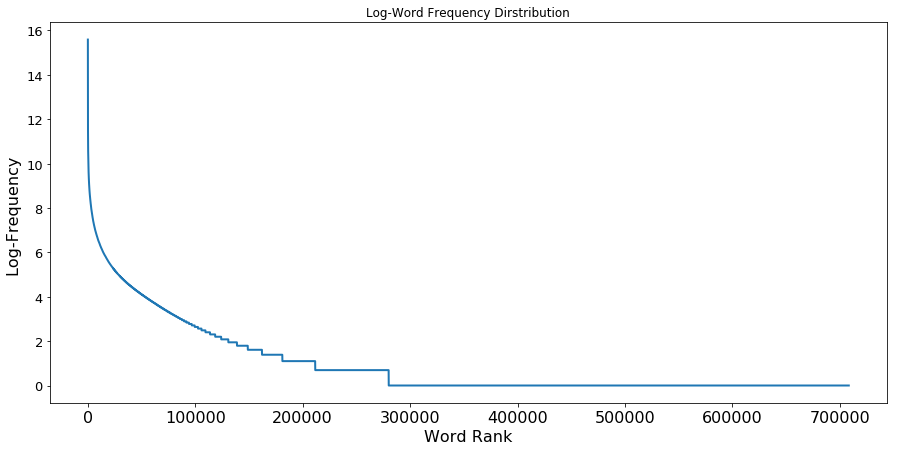

In [76]:
plt.figure()
plt.plot(freq_distribution)
params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '16',
#             'ytick.labelsize': '13',
            'lines.linewidth': '2',
            #'legend.fontsize': '20',
            'figure.figsize': '15,7',  # set figure size
        }
plt.rcParams.update(params)
plt.xlabel('Word Rank')
plt.ylabel('Log-Frequency ')
plt.title('Log-Word Frequency Dirstribution')
plt.show()

In [77]:
print('total Words: %d' % len(sorted_word_counter))
word_counts = 0
for item in sorted_word_counter:
    word_counts += item[1]
print('total Word Counts : %d' % word_counts)

total Words: 708316
total Word Counts : 105935497


# Data Coverage

In [90]:
vocab_nums = [5000,10000,20000,40000,80000,160000]
vals = []
for vocab in vocab_nums:
    counts = 0
    for item in sorted_word_counter[0:vocab]:
        counts += item[1]
    counts += 0.0
    vals.append(counts / word_counts)

/home/v-sixwu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


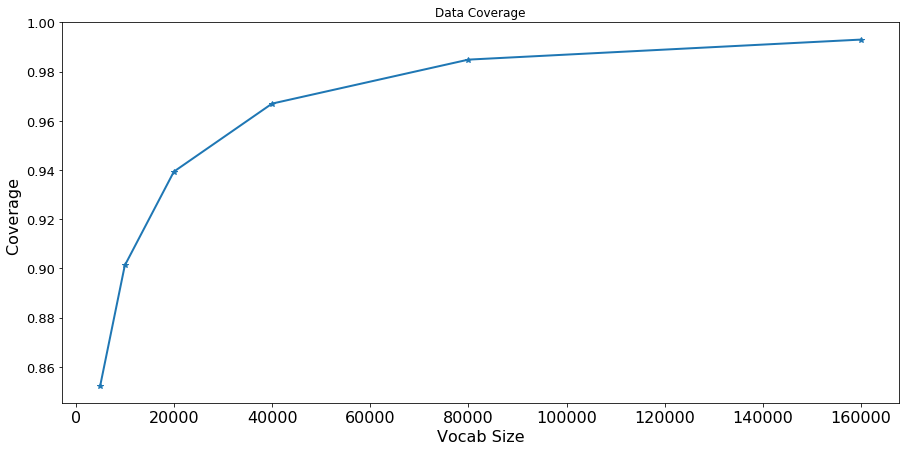

In [91]:
plt.figure()
plt.plot(vocab_nums,vals,'*-')
params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '16',
#             'ytick.labelsize': '13',
            'lines.linewidth': '2',
            #'legend.fontsize': '20',
            'figure.figsize': '15,7',  # set figure size
        }
plt.rcParams.update(params)
plt.xlabel('Vocab Size')
plt.ylabel('Coverage ')
plt.title('Data Coverage')
plt.show()

In [92]:
print( ','.join('%.2f' % x for x in vals))

0.85,0.90,0.94,0.97,0.98,0.99


# 样例分析

In [23]:
# 加载语料

all_corpus = ['word_2W_test.txt','word_4W_test.txt','hybrid_2W_test.txt','hybrid_4W_test.txt','lfw_hybrid_2W_test.txt','lfw_hybrid_4W_test.txt']
texts = []
for corpus in all_corpus:
    with open('/ldev/tensorflow/nmt2/nmt/decoded/'+corpus,'r',encoding='utf-8') as fin:
        lines = fin.readlines()
        texts.append(lines)

In [26]:
# 对照语料

messages =  open('/ldev/tensorflow/nmt2/nmt/data/wordlevel/test.message','r',encoding='utf-8').readlines()
response =  open('/ldev/tensorflow/nmt2/nmt/data/wordlevel/test.message','r',encoding='utf-8').readlines()

In [144]:
cases = [17,555,116,455]
def mygrint(x):
    print(x.strip('\n').replace(" ",""))
for case in cases:
    mygrint('######')
    mygrint(messages[case])
    mygrint(responses[case])
    for text in texts:
        mygrint(text[case])
        
# cases = range(400,500)
# def mygrint(x):
#     print(x.strip('\n').replace(" ",""))
# for case in cases:
#     mygrint('######'+str(case))
#     mygrint(messages[case])
#     mygrint(responses[case])
#     for text in texts:
#         mygrint(text[case])

######
会呼吸的雕塑。透明的质感，柔软的线条让人惊叹。
人生如戏，全靠演技。
<unk><unk>，<unk>。
喜欢这种风格的作品
好漂亮啊，好喜欢。
好美的雕塑，好美。
好美，好美，好美。
喜欢这种风格，很美。
######
美院喵星人伪装得很深啊
也说也做才是王道好吧。
最后一张是<unk>？
我也想养一只喵星人
喵星人伪装得很好。
太有才了，太有才了
喵星人伪装得很到位
喵星人伪装得很到位
######
这样都能睡着……跪了……
同意，总是喜欢外表奢华内脏糜烂
我想知道这是什么品种
我也睡着了，<unk>
我也是这样睡着的。
这也太有爱了吧。！
我也想要这样一个这样的人
这才是真正的人才啊
######
保加利亚总理送给普京保加利亚牧羊犬。好萌。「图转」
中美同发，居心叵测
最后一张是<unk>？
好可爱的狗狗啊。
这种牧@@羊@@犬是什么品种？
普京的眼神好可爱！
好想养一只这样的狗狗
好可爱的狗狗，好可爱
